# HU window を設定する

## 余計な数値を省く　＝　clip　＝　値を指定する
- <u>CT 画像を見る時は興味のある値は限られている</u>
    - *肺　:　HU　-900 ~ -100　で　clip*
        - **上記の値の範囲しか興味がない**
        - **肺を見る時に骨の白さなどはほとんど関係がない**
        - **使用目的によって数値を変える**


- <u>CT 画像は興味のある値　（range）　にだけフォーカスして表示させる</u>
    - *興味のある（見たいところ）組織だけをしっかりと確認することができる*
        - **興味のある値の範囲で　0 ~ 255 の値を当てはめる**
        - **肺　:　HU　-900 ~ -100　で　clip　->　0 ~ 255 の値に変換**


- <u>上記の　range　の事を　**HU Window**　という</u>
    - *肺　:　HU　-900 ~ -100　で　clip*
        - **min　=　-900**
        - **max　=　-100**
        - **np.clip と同じ処理をする**

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import time
import nibabel as nib
import ctvis
from glob import glob
from pathlib import Path
from tqdm import tqdm
from multiprocessing import Pool, cpu_count

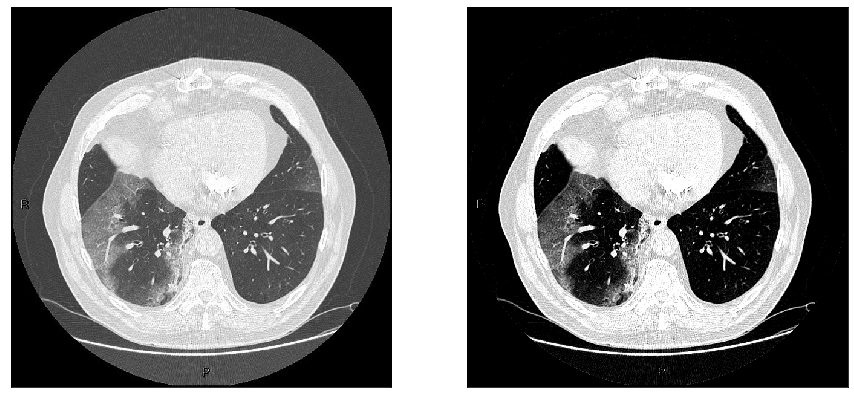

In [2]:
df = ctvis.get_df_all('../public-covid-data')
index = 0
volume = ctvis.load_nifti(df.iloc[index]['FilePathImage'])
mask = ctvis.load_nifti(df.iloc[index]['FilePathMask'])
mask_color = ctvis.label_color(mask)
volume_gray = ctvis.hu_to_gray(volume)
volume_clip = np.clip(volume, -900, 100)                 # 肺　:　HU　-900 ~ -100　で　cli
data = [volume_gray[:, :, 30], volume_clip[:, :, 30]]
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
for idx, i in enumerate(data):
    axes[idx].imshow(i, cmap='gray')
    axes[idx].set_xticks(ticks=[])
    axes[idx].set_yticks(ticks=[])

- *CT data は　RGBのチャネルになっていないので、shpaeが違う*
    - **color 画像ではないが、重ね合わせる時に　shape が合っていた方が重ね合わせ易い**

In [3]:
volume_clip = ctvis.hu_to_gray(volume_clip)

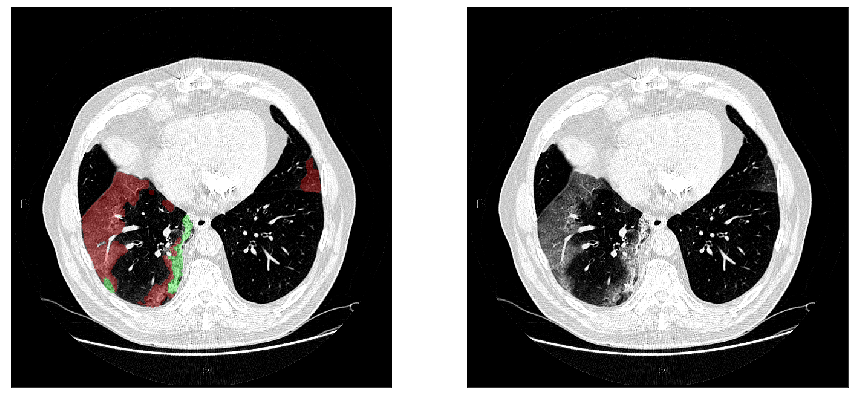

In [5]:
overlayed = ctvis.overlay(volume_clip, mask, mask_color, alpha=0.3)
data = [overlayed[:, :, 30], volume_clip[:, :, 30]]
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
for idx, i in enumerate(data):
    axes[idx].imshow(i, cmap='gray')
    axes[idx].set_xticks(ticks=[])  # 横軸のメモリを消す
    axes[idx].set_yticks(ticks=[])  # 縦軸のメモリを消す